# Introduction to Pandas as a Data Handling Framework
1. Data Structures in Pandas 
2. Handling Data in Pandas 
3. Different Methods invovled 

In [7]:
import pandas as pd 
import numpy as np 

## Series Class in Pandas

In [8]:
# It is just like a One-Dimensional Array which has values and associated with it is index array 
#  Index array can be manipulated to use our own labels or to start from a Specific Point 
# By Defualt it Starts from 0

data = pd.Series([9.75,8.1,7.22,9,8.9,7.85])
print(data)

0    9.75
1    8.10
2    7.22
3    9.00
4    8.90
5    7.85
dtype: float64


**Index and Values Attributes in Series**

In [9]:
# Values Attributes Shows the list of all the values in the given Series Object 
print(data.values)
print("The Data Type of the data.values is :",type(data.values))
# Returns an nd Array
print(data.index)

[9.75 8.1  7.22 9.   8.9  7.85]
The Data Type of the data.values is : <class 'numpy.ndarray'>
RangeIndex(start=0, stop=6, step=1)


**Using Labels for Indexing**

In [10]:
sdata=pd.Series(data.values,index=['Mark','Lucifer','Heisenberg','Allen','Neil','Rubet'])
print(sdata)
# We can Customize the Labels so that we can handle data as per our convenienece 

# Similar to Array Indexing data can fetched using the labels in place of indices 
# When Labels are Used we can't use the Integers for Indexing Purpose 
print("Te SGPA of Mark is : ",sdata['Mark'])
print(type(sdata['Mark']))
print("The Grade for Lucifer is :",sdata['Lucifer'])
print(type(sdata['Mark']))
print(sdata[['Lucifer','Mark','Rubet']]) # Passing List of Columns
print(type(sdata[['Lucifer','Mark','Rubet']]))

# Note that When we pass Single Label data type of value is returned 
# But When we use list to access multiple Labels Series dtype is returned 

Mark          9.75
Lucifer       8.10
Heisenberg    7.22
Allen         9.00
Neil          8.90
Rubet         7.85
dtype: float64
Te SGPA of Mark is :  9.75
<class 'numpy.float64'>
The Grade for Lucifer is : 8.1
<class 'numpy.float64'>
Lucifer    8.10
Mark       9.75
Rubet      7.85
dtype: float64
<class 'pandas.core.series.Series'>


**Filtering using Boolean , Scalar Multiplication,Math Functions Arithmetic Operations**

In [11]:
# Note that performing the above on Series dtype presever the 'index-value' Link together 

print("All the gpas above 8 pointers \n",sdata[sdata>8.00]) # Filters out all the Seires Type of Indexing using Conditions
print("Normalizing Data on the Scale of 0-1 \n",sdata/10)
print(sdata)

All the gpas above 8 pointers 
 Mark       9.75
Lucifer    8.10
Allen      9.00
Neil       8.90
dtype: float64
Normalizing Data on the Scale of 0-1 
 Mark          0.975
Lucifer       0.810
Heisenberg    0.722
Allen         0.900
Neil          0.890
Rubet         0.785
dtype: float64
Mark          9.75
Lucifer       8.10
Heisenberg    7.22
Allen         9.00
Neil          8.90
Rubet         7.85
dtype: float64


**Transforming to Series using *Constructors***

In [12]:
# To better understand how the Data is ACtually Stored in Seires 
# Dictionary is the best way to Understand it 
#  Each key corresponds to a index label 
#  Each  Value Corresponds to a Values in Series

dict_={
	'India':'Delhi',
	'Japan':'Tokyo',
	"USA":'Washington D.C',
	'China':'Bejing',
	'France':'Paris',
	'United Kingdon':'London'
}

# Converting it to Pandas Series 
capitals=pd.Series(dict_)
print(capitals)

# Playing with indexes 
#  Filtering out data , Combining the Data can also be done using index Labels 
# When you are only passing a dict, the index in the resulting Series will have the dict’s
#  keys in sorted order. You can override this by passing the dict keys in the order you
#  want them to appear in the resulting Series:
index_capitals=['India','China','France','United Kingdom','Germany','Sweden']
capped_indexed_capitals=pd.Series(dict_,index=index_capitals)
print("Personalized Indexing to override key values order in dictionary : \n",capped_indexed_capitals)

# The NaN -->(Not a Number ) That the Index order passed had index which was not available as a Key in the Given 
# Dictionary

# When Overiding the Key:values in dictionary using indexes the index not mentioned explicitly in the
# index attribute won't be taken into Consideration in the Series  

India                      Delhi
Japan                      Tokyo
USA               Washington D.C
China                     Bejing
France                     Paris
United Kingdon            London
dtype: object
Personalized Indexing to override key values order in dictionary : 
 India              Delhi
China             Bejing
France             Paris
United Kingdom       NaN
Germany              NaN
Sweden               NaN
dtype: object


***Using `inull()` & `notnull()` Functions in Pandas or onthe Series Object itself***

In [13]:
# Both isnull() and notnull() returns us Series object with dtype boolean
# These methods can be used using Pandas or as a instance methods in Series
print("The Null Values in Series are as follows : ",pd.isnull(index_capitals))
print(capped_indexed_capitals.isnull())
print("Using the NotNull Functions : \n",capped_indexed_capitals.notna())

The Null Values in Series are as follows :  [False False False False False False]
India             False
China             False
France            False
United Kingdom     True
Germany            True
Sweden             True
dtype: bool
Using the NotNull Functions : 
 India              True
China              True
France             True
United Kingdom    False
Germany           False
Sweden            False
dtype: bool


**Alignment during operations by index Labels & The `name` Attribute in Pandas**

In [14]:
# Using seires we can automatically align data usign the index labels 
#  Creating two similar types of Series Data 

s1=pd.Series([3.4,3.54,0.9,2.54,0.3,0.5],index=['USA','China','Japan','Germany','India','Brazil'])
s1.name="GDP of Countries Post Covid-19"
s1.index.name="Countries"

# Series related to some indexing parameters lets say adjustment rate overtime 
s2=pd.Series([0.0023,0.000054,0.00021,0.002,0.00003,0.000235],index=['USA','China','Japan','Germany','India','Brazil'])
s2.name="Rate adjustment Post Covid -19"
s2.index.name="Countries"
# The name attribute is Associated with the Series.index (with the index of the Series)
# Also the name attribute is Associated with Series as a Whole itself 
# Kind of Like More data explaining the given data 

print(f"the given data shows : {s1.name} \n {s1} \n")

print(f"the given data shows : {s2.name} \n {s2} \n")

# Now Both the Parameters can be combined by using the label for indexing to get
# meaningful data for current scenario

print(s1+s2)


the given data shows : GDP of Countries Post Covid-19 
 Countries
USA        3.40
China      3.54
Japan      0.90
Germany    2.54
India      0.30
Brazil     0.50
Name: GDP of Countries Post Covid-19, dtype: float64 

the given data shows : Rate adjustment Post Covid -19 
 Countries
USA        0.002300
China      0.000054
Japan      0.000210
Germany    0.002000
India      0.000030
Brazil     0.000235
Name: Rate adjustment Post Covid -19, dtype: float64 

Countries
USA        3.402300
China      3.540054
Japan      0.900210
Germany    2.542000
India      0.300030
Brazil     0.500235
dtype: float64


## DataFrame Class in Pandas

*The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. The exact details of DataFrame’s internals are outside the scope of this book.*

**Using the Dataframe Constructor to Form a df by passing relevant parameters**

In [15]:
# One of the best ways to create dataframes is by using Dictionary of one-d Lists
# This can be sasid as passing of objects to the Dataframe Constructor 

stock_dict={
	"Stock Name":['ADANIENT','RELIANCE','POWERGRID','SBIN'],
	"Company Name":['Adani Enterprises','Reliance','Power Grid','State Bank of India'],
	"Opening Price":[3065.00,2940.30,333.30,806.60],
	"Closing Price":[3109,2957.75,339,811.40]

}

stock_df=pd.DataFrame(stock_dict)
stock_df

,Stock Name,Company Name,Opening Price,Closing Price
0,ADANIENT,Adani Enterprises,3065.0,3109.00
1,RELIANCE,Reliance,2940.3,2957.75
2,POWERGRID,Power Grid,333.3,339.00
3,SBIN,State Bank of India,806.6,811.40


**Methods & Attributes  in Data Frames**
1. Passing args to Constructor of Dataframe class 
2. Columns Attribute
3. Index Attribute
4. Retrieving Columns as an Individual Seires in Pandas 
5. Accessing the Rows using the `loc` Attribute
6. Creating New Columns and Insertion at Speified Location using the Index Attribute
7. Passing Nested Dictionaries to Constructor of the Dataframe

In [16]:
# To display first 5 rows of dataframe using head() method be defult parameter
# head(5)
stock_df.head(2)

# Arranging the Columns of the Dataframe can be done while making dict to df 
print(pd.DataFrame(stock_dict,columns=['Company Name','Stock Name','Opening Price','Closing Price']))

# Similarly the Index Attribute can also be changed just like with Series Object
stock_df=pd.DataFrame(stock_dict,index=[1,2,3,4])
print(stock_df)

# print(stock_df.columns)  # Return Index Object of all the Columns present in the dataset
# type(stock_df.columns)

          Company Name Stock Name  Opening Price  Closing Price
0    Adani Enterprises   ADANIENT         3065.0        3109.00
1             Reliance   RELIANCE         2940.3        2957.75
2           Power Grid  POWERGRID          333.3         339.00
3  State Bank of India       SBIN          806.6         811.40
  Stock Name         Company Name  Opening Price  Closing Price
1   ADANIENT    Adani Enterprises         3065.0        3109.00
2   RELIANCE             Reliance         2940.3        2957.75
3  POWERGRID           Power Grid          333.3         339.00
4       SBIN  State Bank of India          806.6         811.40


In [17]:
# Accessing Columns in a DataFrame : -
# 1. Using indexing by Column Labels 
print(stock_df['Company Name'])

print("Accessing Multiple Cloumns : ",stock_df[['Company Name','Stock Name']])
# Accessing Multiple Columns at Once by Passing List of Columns for Indexing



1      Adani Enterprises
2               Reliance
3             Power Grid
4    State Bank of India
Name: Company Name, dtype: object
Accessing Multiple Cloumns :            Company Name Stock Name
1    Adani Enterprises   ADANIENT
2             Reliance   RELIANCE
3           Power Grid  POWERGRID
4  State Bank of India       SBIN


**Important Note :** \
*frame2[column] works for any column name, but frame2.column only works when the column name is a valid Python variable name* \
If a Columns name is not present then new Columns  can be created using df['Column_Name']

In [18]:
print(stock_df.head())

stock_df['Stock Name']
# It is important to Note that all the Columns which has valid name attribute present in This inabove Case 'Stock Name' is clearly visible can be accessed using 
#  df.column_name but in this example the column name has two words Stock Name --> PROBLEM ??? 

  Stock Name         Company Name  Opening Price  Closing Price
1   ADANIENT    Adani Enterprises         3065.0        3109.00
2   RELIANCE             Reliance         2940.3        2957.75
3  POWERGRID           Power Grid          333.3         339.00
4       SBIN  State Bank of India          806.6         811.40


1     ADANIENT
2     RELIANCE
3    POWERGRID
4         SBIN
Name: Stock Name, dtype: object

In [19]:
# Accesssing the Rows
print(stock_df)
# Syntax --> 
#  df.loc[labels/index/list of indices]
print("Fethiing the data of 3rd rows ",stock_df.loc[3]) 

  Stock Name         Company Name  Opening Price  Closing Price
1   ADANIENT    Adani Enterprises         3065.0        3109.00
2   RELIANCE             Reliance         2940.3        2957.75
3  POWERGRID           Power Grid          333.3         339.00
4       SBIN  State Bank of India          806.6         811.40
Fethiing the data of 3rd rows  Stock Name        POWERGRID
Company Name     Power Grid
Opening Price         333.3
Closing Price         339.0
Name: 3, dtype: object


*In Python the `NULL` is represented by `None` Keyword*

In [20]:
# Creating new Columns :-
stock_df['Net Profit']=stock_df['Closing Price']-stock_df['Opening Price']
# New Label for Stock Exhange 
stock_df['Exchange']='NSE'
stock_df

# Creating a null Column
stock_df['Position']=np.nan
stock_df


,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.0,3109.00,44.00,NSE,NaN
2,RELIANCE,Reliance,2940.3,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.3,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.6,811.40,4.80,NSE,NaN


In [21]:
#Placing certaing values in position columns using Index labels for insertion at spcified rows for position column
stock_df['Position']=pd.Series(['Short','None'],index=[1,4])
stock_df


,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.0,3109.00,44.00,NSE,Short
2,RELIANCE,Reliance,2940.3,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.3,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.6,811.40,4.80,NSE,None


*The column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.*

In [23]:
# Using Nested Dictionaries to Create DataFrame 
#  If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys
#  as the columns and the inner keys as the row indices:

housing_={
	"Andheri":{'1BHK':1.50,'3BHK':5.0},
	"Malabar Hills":{'1BHK':10.00,'3BHK':20.00,'2BHK':15.00}
}

# Passing the Arguments to Consturctor of Dataframe :
house_df=pd.DataFrame(housing_,index=['1BHK','2BHK','3BHK'])
house_df

,Andheri,Malabar Hills
1BHK,1.5,10.0
2BHK,NaN,15.0
3BHK,5.0,20.0


In [29]:
# Using Transpose on the Dictionary : 
print(house_df.T)

# Similary Like Nested Dictionaries / (We can pass Dictionaries of Series Instead)
# Using The Existing House_df to Extract a Series AThrough Indexing/ Slicing 

series_df ={
	'Andheri':house_df['Andheri'][:-1],  # Here -1 Index is Excluded 
	'Malabar Hills':house_df['Malabar Hills'][:3]   # here the third index is excluded 
}
# Converting to a Dataframe 
print(pd.DataFrame(series_df))


               1BHK  2BHK  3BHK
Andheri         1.5   NaN   5.0
Malabar Hills  10.0  15.0  20.0
      Andheri  Malabar Hills
1BHK      1.5           10.0
2BHK      NaN           15.0
3BHK      NaN           20.0


* `name` Attribute for Dataframe's Index's and Columns

In [31]:
# Name Attribute 
house_df.index.name='Area'
house_df.columns.name='Location'
house_df

Location,Andheri,Malabar Hills
Area,,
1BHK,1.5,10.0
2BHK,NaN,15.0
3BHK,5.0,20.0



* As with Series, the `values` attribute returns the data contained in the DataFrame as a  two-dimensional ndarray

In [35]:
house_df.values
# Returns values in 2d array 

array([[ 1.5, 10. ],
       [ nan, 15. ],
       [ 5. , 20. ]])

![Screenshot 2024-08-19 094821.png](<attachment:Screenshot 2024-08-19 094821.png>)
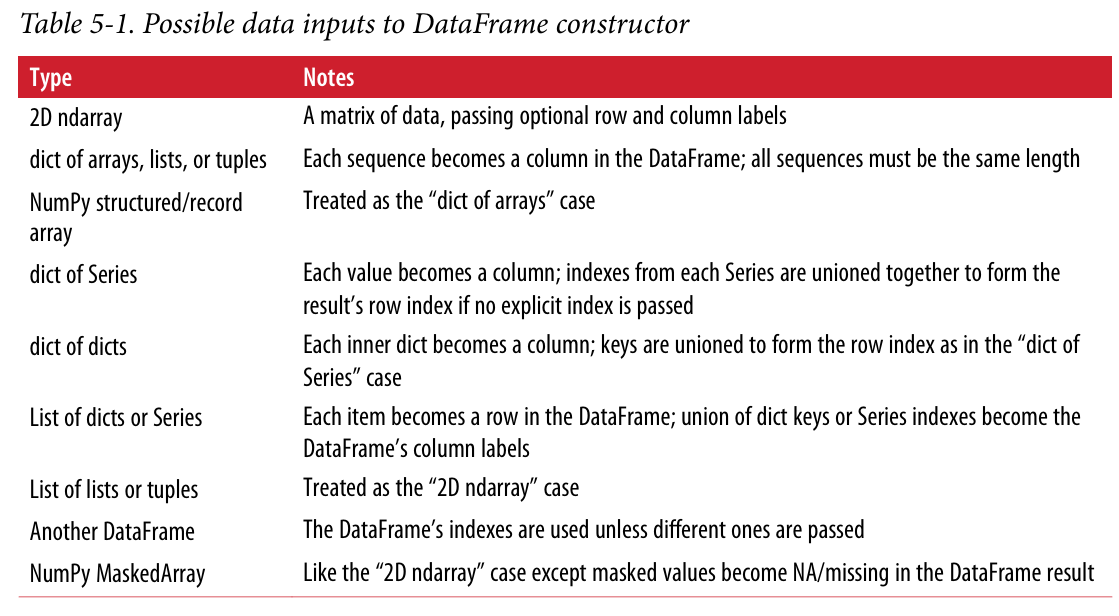

## Index Class in Pandas 
*  pandas’s Index objects are responsible for holding the `axis labels` and other metadata (like the `axis name` or `names`). Any array or other `sequence of labels` you use when constructing a Series or DataFrame is `internally converted to an Index`

1. Indexes are immutable & can't be modified by the user 
2. Immutability makes it safer to share Index objects among data structures


In [41]:
stock_df

,Stock Name,Company Name,Opening Price,Closing Price,Net Profit,Exchange,Position
1,ADANIENT,Adani Enterprises,3065.0,3109.00,44.00,NSE,Short
2,RELIANCE,Reliance,2940.3,2957.75,17.45,NSE,NaN
3,POWERGRID,Power Grid,333.3,339.00,5.70,NSE,NaN
4,SBIN,State Bank of India,806.6,811.40,4.80,NSE,None


In [47]:
# index is although a very small topic it plays a crucial role while dealing with data stock_df
print("All thwe Columns are stored in the Following format : ",type(stock_df.columns))
print("All the index labels are stored in the following format : ",type(stock_df.index))

# Note that when we pass list for indices to index attribute it gets internally converted to index object
# Example: -
label=[1,2,3,4,5]
print(f'The dtype of {label} is {type(label)} ')
index_list=pd.Index(label)
print(f'The dtype of {index_list} is {type(index_list)} ')

# Now once the above label list has been transformed to index object it can never be modified 
# index_list[2]=78 --> Throws a 'TypeError'

All thwe Columns are stored in the Following format :  <class 'pandas.core.indexes.base.Index'>
All the index labels are stored in the following format :  <class 'pandas.core.indexes.base.Index'>
The dtype of [1, 2, 3, 4, 5] is <class 'list'> 
The dtype of Index([1, 2, 3, 4, 5], dtype='int64') is <class 'pandas.core.indexes.base.Index'> 


In [ ]:
# Many Set-Like Operations are supported by the Index Object 
# Unlike Python sets, a pandas Index can contain duplicate labels
# Selections with duplicate labels will select all occurrences of that label.


![Screenshot 2024-08-19 095354.png](<attachment:Screenshot 2024-08-19 095354.png>)
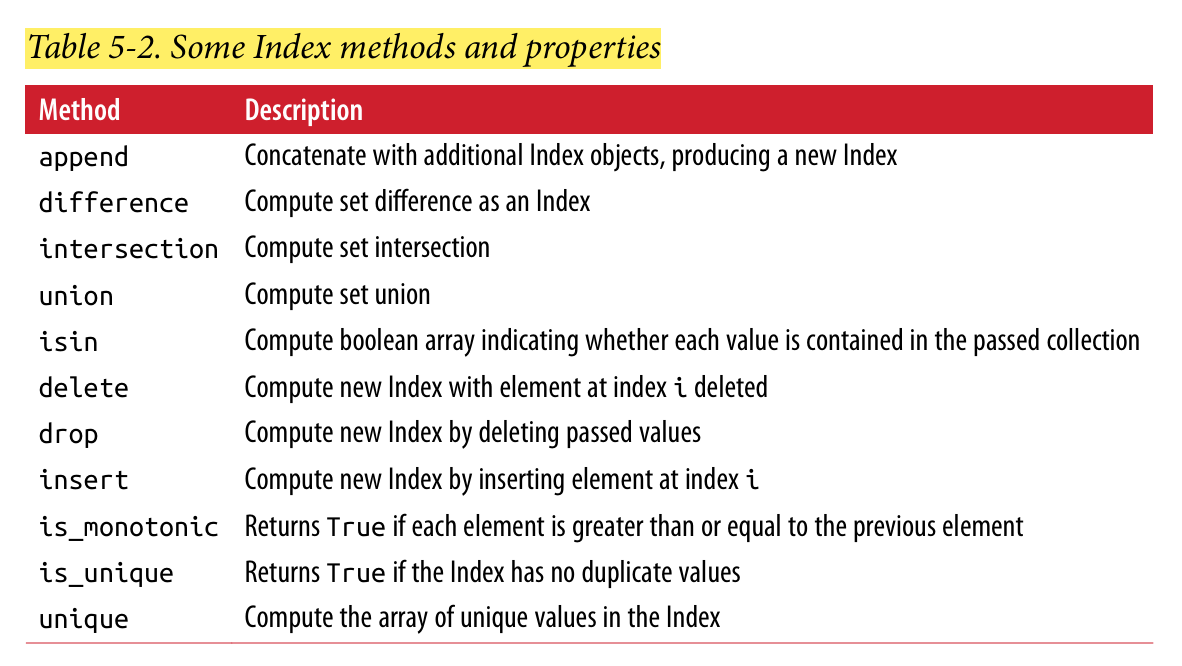

# Essential Functionality in Pandas 

*reindex method on pandas objects*
* An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index
*However it is important to note that the order will be followed as per the previous indexing and any element missing in the new indexing will be taken as `NaN`*

#### On Pandas Series 

In [54]:
count=pd.Series(['USA','China','France','Germany','India','Japan','UK'],index=[6,4,3,5,2,1,7])
print(count,"\n")

# Note that a New Pandas Object is created when we use the 'reindex' method on Series,Dataframe,etc

ord_count=count.reindex([1,2,3,4,5,6,7,8])
print(ord_count)

6        USA
4      China
3     France
5    Germany
2      India
1      Japan
7         UK
dtype: object 

1      Japan
2      India
3     France
4      China
5    Germany
6        USA
7         UK
8        NaN
dtype: object


*For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as ffill, which `forward-fills` the values*

In [60]:
color=pd.Series(["blue","green","red","yellow"],index=[3,4,7,8])
print(color,"\n")

color_ser=color.reindex([1,2,3,4,5,6,7,8],method="ffill")
print(color_ser)


3      blue
4     green
7       red
8    yellow
dtype: object 

1       NaN
2       NaN
3      blue
4     green
5     green
6     green
7       red
8    yellow
dtype: object


#### On Pandas DataFrame 

In [70]:
# When Considering DataFrames:
# With DataFrame, reindex can alter either the (row) index, columns, or both. When passed
# only a sequence, it reindexes the rows in the result:

# Creating Data Frame using NumPy Arrays : 
arr_df = pd.DataFrame(np.arange(9).reshape(3,3),index=[2,4,5],columns=['C1','C2','C3'])
print(arr_df,"\n")

dup_arr_df=arr_df.reindex(index=[1,2,3,4,5],columns=['C1','C2','C3','C10'])
print(dup_arr_df)

# All the values which are not present in the orginal df and which are called upon in the reindex method
# Will be Assigned as the null values 



   C1  C2  C3
2   0   1   2
4   3   4   5
5   6   7   8 

    C1   C2   C3  C10
1  NaN  NaN  NaN  NaN
2  0.0  1.0  2.0  NaN
3  NaN  NaN  NaN  NaN
4  3.0  4.0  5.0  NaN
5  6.0  7.0  8.0  NaN


**As we’ll explore in more detail, you can reindex more succinctly by label-indexing with loc, and many users prefer to use it exclusively**

![Screenshot 2024-08-19 103114.png](<attachment:Screenshot 2024-08-19 103114.png>)
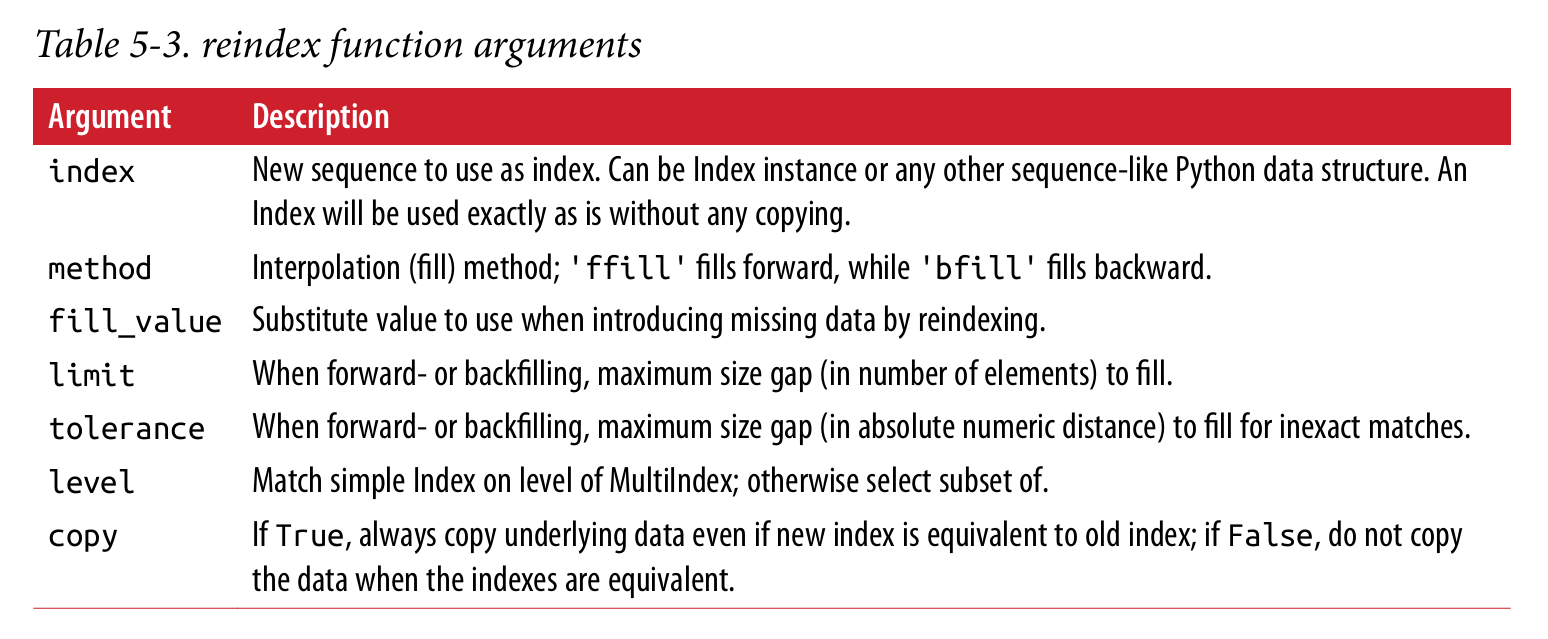